In [2]:
import pandas as pd
import numpy as np


In [6]:
Customers = pd.read_csv("Customers.csv")

In [7]:
Customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [8]:
Products = pd.read_csv("Products.csv")

In [9]:
Products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [10]:
Transactions = pd.read_csv("Transactions.csv")

In [11]:
Transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

*Check for missing values*

In [13]:
Customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [14]:
Products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [15]:
Transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

*Convert date columns to datetime format*

In [16]:
Customers['SignupDate'] = pd.to_datetime(Customers['SignupDate'])

In [17]:
Customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [18]:
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])

In [19]:
Transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


*Checking for duplicates in Columns*

In [23]:
Customers.duplicated().sum()

0

In [24]:
Products.duplicated().sum()

0

In [25]:
Transactions.duplicated().sum()

0

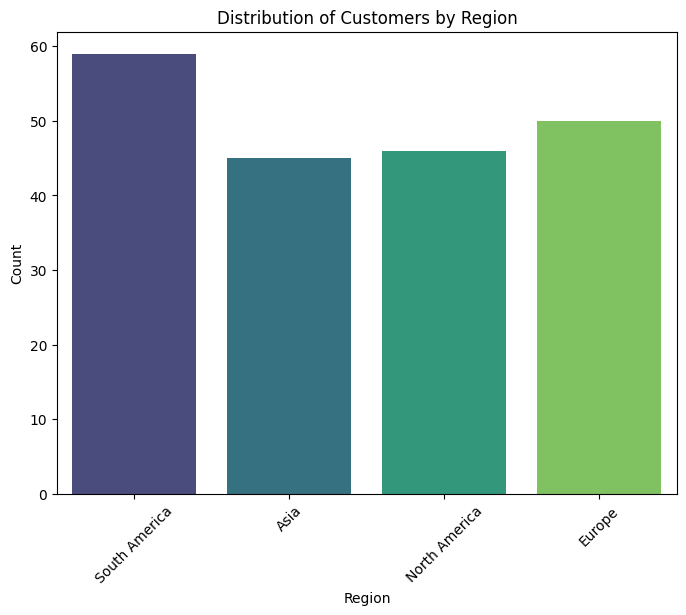

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=Customers, x='Region', palette='viridis', hue='Region', dodge=False)
plt.legend([], [], frameon=False)  # This hides the legend
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

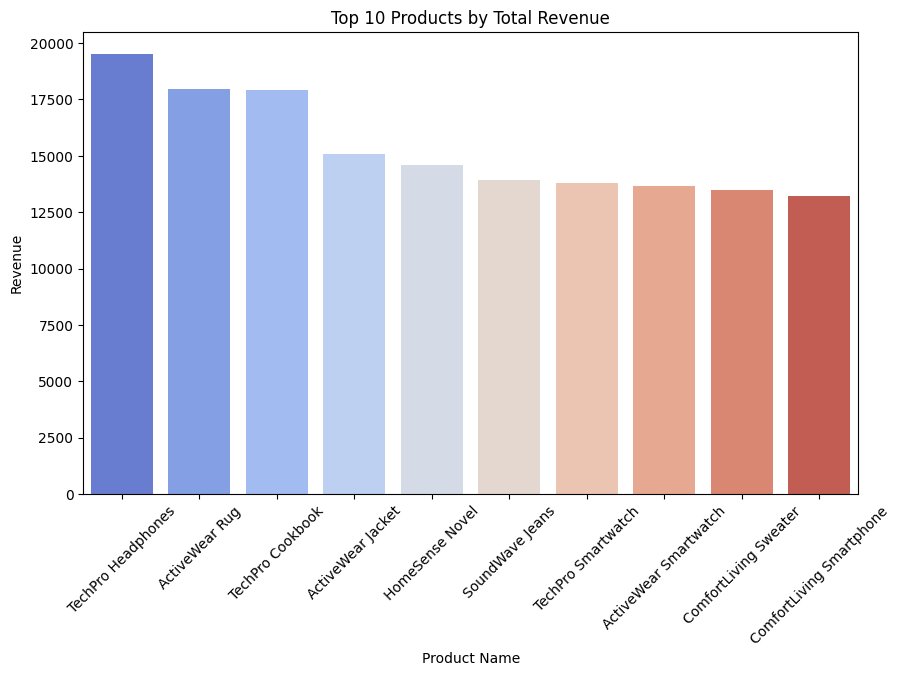

In [29]:
Transactions['Revenue'] = Transactions['Quantity'] * Transactions['Price']
product_revenue = Transactions.groupby('ProductID')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products = pd.merge(product_revenue, Products, on='ProductID')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='ProductName', y='Revenue', palette='coolwarm', hue='ProductName', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

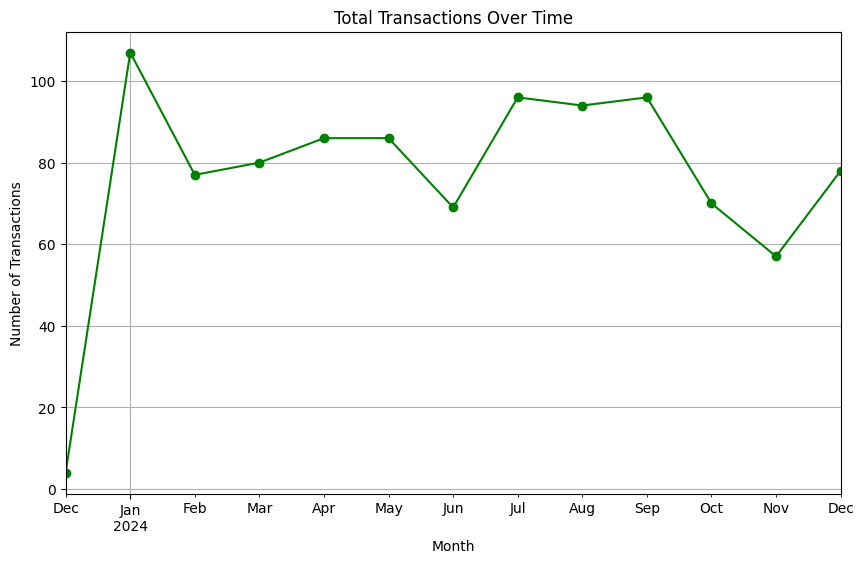

In [31]:
Transactions['Month'] = Transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = Transactions.groupby('Month')['TransactionID'].count()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='green')
plt.title('Total Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

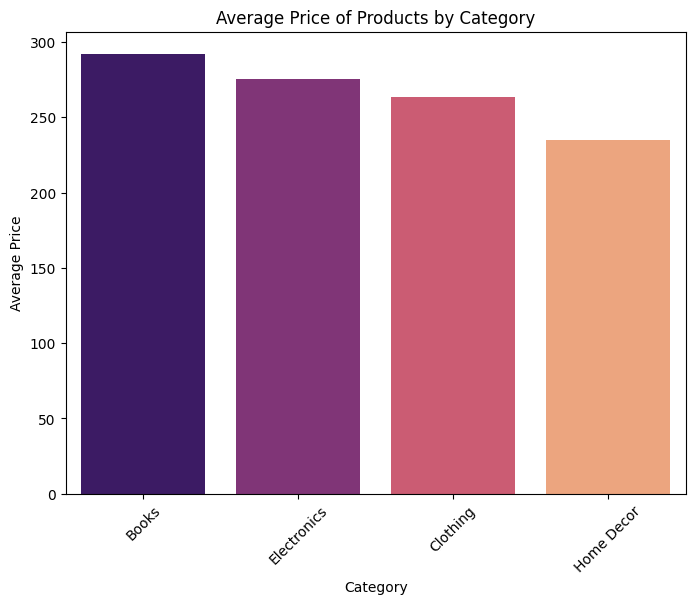

In [33]:
avg_price_category = Products.groupby('Category')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=avg_price_category.index,
    y=avg_price_category.values,
    palette='magma',
    hue=avg_price_category.index,
    dodge=False  
)
plt.legend([], [], frameon=False)

plt.title('Average Price of Products by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

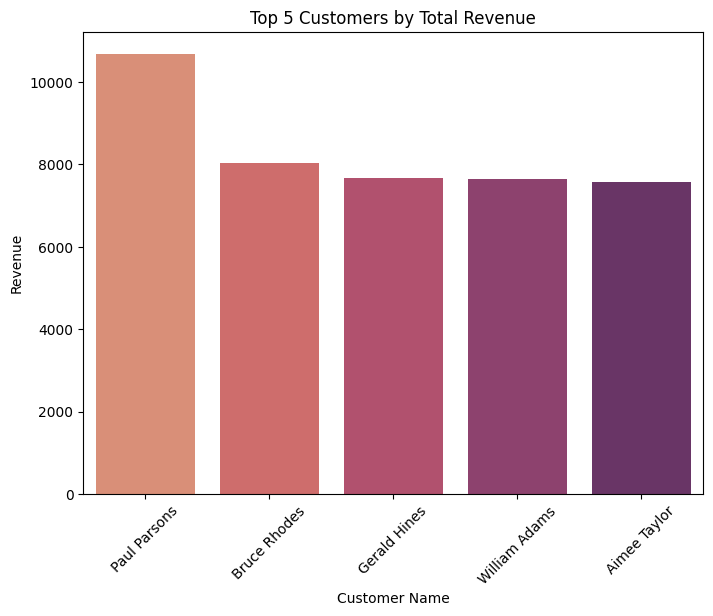

In [36]:
customer_revenue = Transactions.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(5)
top_customers = pd.merge(customer_revenue, Customers, on='CustomerID')

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_customers,
    x='CustomerName',
    y='Revenue',
    palette='flare',
    hue='CustomerName',
    dodge=False 
)
plt.legend([], [], frameon=False) 

plt.title('Top 5 Customers by Total Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [65]:
total_revenue = Transactions['Revenue'].sum()
Transactions['YearMonth'] = Transactions['TransactionDate'].dt.to_period('M')
monthly_sales = Transactions.groupby('YearMonth')['Revenue'].sum()

# Check popular products
popular_products = Transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)

# Sales by region
sales_by_region = Transactions.merge(Customers[['CustomerID', 'Region']], on='CustomerID').groupby('Region')['Revenue'].sum()
business_insights = """
Business Insights
1. Total Revenue: The total revenue generated from all transactions is ${:.2f}.
2. Top-Selling Products: The most popular product is Product ID {} with {} units sold.
3. Customer Contribution: The top customer (Customer ID {}) contributed ${:.2f} in revenue.
4. Regional Analysis: The region with the highest revenue is {} with ${:.2f} in sales.
5. Monthly Trends: Revenue trends indicate the highest sales occurred in {}.
""".format(
    total_revenue,
    popular_products.idxmax(),
    popular_products.max(),
    Transactions.groupby('CustomerID')['Revenue'].sum().idxmax(),
    Transactions.groupby('CustomerID')['Revenue'].sum().max(),
    sales_by_region.idxmax(),
    sales_by_region.max(),
    monthly_sales.idxmax()
)

# Writing insights in text file
with open('business_insights.txt', 'w') as file:
    file.write(business_insights)

print(business_insights)


Business Insights
1. Total Revenue: The total revenue generated from all transactions is $689995.56.
2. Top-Selling Products: The most popular product is Product ID P059 with 46 units sold.
3. Customer Contribution: The top customer (Customer ID C0141) contributed $10673.87 in revenue.
4. Regional Analysis: The region with the highest revenue is South America with $219352.56 in sales.
5. Monthly Trends: Revenue trends indicate the highest sales occurred in 2024-07.



In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
customer_transactions = Transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()
customer_data = pd.merge(Customers, customer_transactions, on='CustomerID', how='left').fillna(0)
customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)
scaler = StandardScaler()
customer_data_encoded[['Quantity', 'Revenue']] = scaler.fit_transform(customer_data_encoded[['Quantity', 'Revenue']])
customer_data_encoded.set_index('CustomerID', inplace=True)

In [49]:
customer_data_encoded.head()

,CustomerName,SignupDate,Quantity,Revenue,Region_Europe,Region_North America,Region_South America
CustomerID,,,,,,,
C0001,Lawrence Carroll,2022-07-10,-0.110735,-0.051884,False,False,True
C0002,Elizabeth Lutz,2022-02-13,-0.434049,-0.862714,False,False,False
C0003,Michael Rivera,2024-03-07,0.212579,-0.393842,False,False,True
C0004,Kathleen Rodriguez,2022-10-09,1.667493,1.035375,False,False,True
C0005,Laura Weber,2022-08-15,-0.919021,-0.769499,False,False,False


In [50]:
customer_data_encoded.dtypes

CustomerName                    object
SignupDate              datetime64[ns]
Quantity                       float64
Revenue                        float64
Region_Europe                     bool
Region_North America              bool
Region_South America              bool
dtype: object

In [51]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder()
# customer_data_encoded = encoder.fit_transform(customer_data).toarray()

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Merge customer profile and aggregated transaction data
customer_transactions = Transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()
customer_data = pd.merge(Customers, customer_transactions, on='CustomerID', how='left').fillna(0)

# One-hot encode the 'Region' column
customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Drop non-numeric columns (CustomerName, SignupDate) that aren't needed for similarity
customer_data_encoded = customer_data_encoded.drop(['CustomerName', 'SignupDate'], axis=1)

# Standardize numeric columns (Quantity and Revenue)
scaler = StandardScaler()
customer_data_encoded[['Quantity', 'Revenue']] = scaler.fit_transform(customer_data_encoded[['Quantity', 'Revenue']])

# Set CustomerID as the index for easy reference
customer_data_encoded.set_index('CustomerID', inplace=True)

# Compute cosine similarity
similarity_matrix = cosine_similarity(customer_data_encoded)

# Convert similarity matrix to DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=customer_data_encoded.index, columns=customer_data_encoded.index)

print("Cosine similarity matrix computed successfully!")


Cosine similarity matrix computed successfully!


In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Use the same customer_data_encoded from the Lookalike model
X = customer_data_encoded[['Quantity', 'Revenue']]  # Use only numerical features for clustering


In [60]:
# Find the optimal number of clusters using the Davies-Bouldin Index
cluster_metrics = []
for n_clusters in range(2, 11):  # Between 2 and 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    cluster_metrics.append((n_clusters, db_index))

# Select the best number of clusters (lowest DBI)
optimal_clusters = min(cluster_metrics, key=lambda x: x[1])[0]
print(f"Optimal Number of Clusters: {optimal_clusters}")

# Perform K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data_encoded['Cluster'] = kmeans.fit_predict(X)

# Save cluster labels back to customer_data
Customers['Cluster'] = customer_data_encoded['Cluster'].values


Optimal Number of Clusters: 2


C:\Users\ehsaa\AppData\Local\Temp\ipykernel_19144\1177630750.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', optimal_clusters)


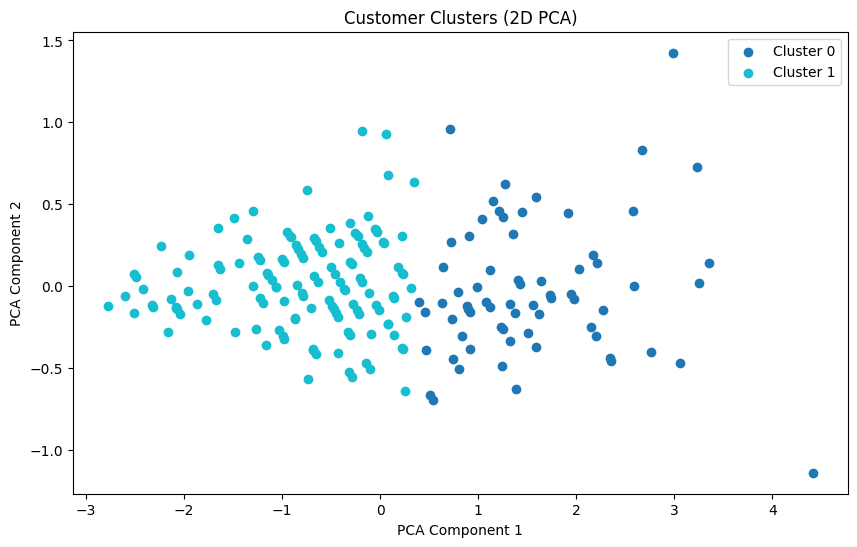

Davies-Bouldin Index for the final clustering: 0.6298644531019864


In [61]:
import matplotlib.cm as cm

# Visualize clusters in 2D space using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
customer_data_encoded['PCA1'] = X_pca[:, 0]
customer_data_encoded['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', optimal_clusters)

for cluster in range(optimal_clusters):
    cluster_data = customer_data_encoded[customer_data_encoded['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', color=colors(cluster))

plt.title('Customer Clusters (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Calculate Davies-Bouldin Index
dbi_final = davies_bouldin_score(X, customer_data_encoded['Cluster'])
print(f"Davies-Bouldin Index for the final clustering: {dbi_final}")
